## Multi Class Classification

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

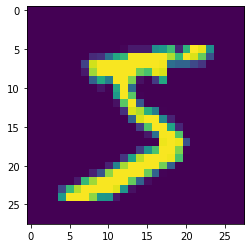

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
# now we will scale the input values so as to achieve the convergence fast while training the neural network

X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
# we need to flatten the 2d image array (28 x 28) into single dimension array (784) to feed into the 784 input nodes of NN

model = Sequential()

model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2946 - accuracy: 0.9142 - val_loss: 0.1714 - val_accuracy: 0.9489
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1228 - accuracy: 0.9627 - val_loss: 0.1341 - val_accuracy: 0.9601
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0849 - accuracy: 0.9745 - val_loss: 0.0971 - val_accuracy: 0.9726
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0622 - accuracy: 0.9816 - val_loss: 0.0998 - val_accuracy: 0.9695
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0493 - accuracy: 0.9845 - val_loss: 0.0897 - val_accuracy: 0.9729
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0384 - accuracy: 0.9877 - val_loss: 0.0907 - val_accuracy: 0.9750
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0312 - accuracy: 0.9898 - val_loss: 0.0994 - val_accuracy

In [16]:
y_prob = model.predict(X_test)

In [17]:
y_prob

array([[1.26021149e-09, 6.08382589e-09, 8.27907787e-09, ...,
        9.99999046e-01, 2.65507172e-08, 4.63782399e-08],
       [3.84937892e-15, 5.51603829e-09, 1.00000000e+00, ...,
        1.29057422e-18, 5.49951855e-11, 7.27767668e-19],
       [6.22621474e-06, 9.99886513e-01, 8.83866305e-05, ...,
        1.19878105e-05, 6.59290299e-06, 1.97221550e-09],
       ...,
       [2.73231521e-16, 2.13726233e-14, 4.59865304e-17, ...,
        1.29926781e-11, 3.50703494e-10, 7.71276287e-09],
       [9.90262317e-11, 2.94968425e-11, 2.49179888e-18, ...,
        2.81317377e-16, 3.24591792e-06, 7.51900030e-16],
       [2.42290086e-12, 1.06192653e-16, 1.43780116e-12, ...,
        1.63213347e-21, 5.67631337e-14, 1.55799746e-15]], dtype=float32)

In [18]:
y_pred = y_prob.argmax(axis = 1)

In [19]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9768

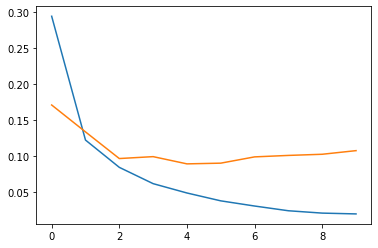

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

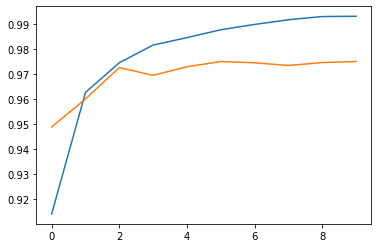

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

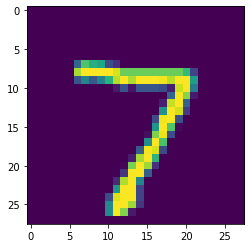

In [23]:
plt.imshow(X_test[0])

In [24]:
model.predict(X_test[0].reshape(1, 28, 28)).argmax(axis = 1)[0]

7

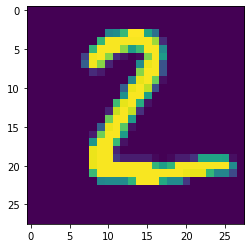

In [25]:
plt.imshow(X_test[1])

In [26]:
model.predict(X_test[1].reshape(1, 28, 28)).argmax(axis = 1)[0]

2

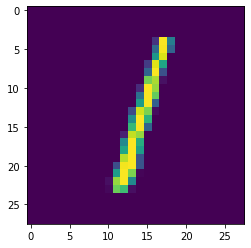

In [27]:
plt.imshow(X_test[2])

In [28]:
model.predict(X_test[2].reshape(1, 28, 28)).argmax(axis = 1)[0]

1

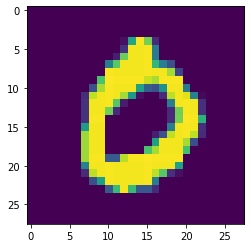

In [29]:
plt.imshow(X_test[3])

In [30]:
model.predict(X_test[3].reshape(1, 28, 28)).argmax(axis = 1)[0]

0

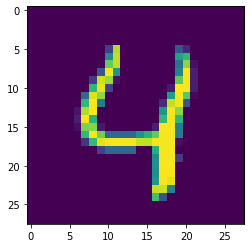

In [31]:
plt.imshow(X_test[4])

In [32]:
model.predict(X_test[4].reshape(1, 28, 28)).argmax(axis = 1)[0]

4